In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [160]:
data = pd.read_excel("Cleaned up Boston House Price Data.xlsx")


Y = data['PRICE'].values
n = int(len(Y))

X = data.iloc[:, :-1].values
no_of_vars = X.shape[1]

'''
feature_names = data.columns.tolist()
feature_names_without_Y = [col for col in feature_names if col !='PRICE']

X = pd.DataFrame(X, columns=feature_names_without_Y)'''

print(f"No of features: {no_of_vars}")
print(f"Number of samples: {n}")

print(X)

No of features: 14
Number of samples: 510
[[0.0000e+00 6.3200e-03 1.8000e+01 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [1.0000e+00 2.7310e-02 0.0000e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.0000e+00 2.7290e-02 0.0000e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [5.0700e+02 6.0760e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [5.0800e+02 1.0959e-01 0.0000e+00 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [5.0900e+02 4.7410e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [161]:
X_mean = np.mean(X,axis=0)
X_std = np.std(X,axis=0)

X = (X-X_mean)/X_std
print(X)

'''from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X = scalar.fit_transform(X)
feature_names = data.columns.tolist()
feature_names_without_Y = [col for col in feature_names if col !='PRICE']

data = pd.DataFrame(X, columns=feature_names_without_Y)
data['Price'] = Y

print(data)'''

print(X.shape)

[[-1.72865795 -0.41877882  0.28233273 ... -1.45451613  0.44241865
  -1.07427512]
 [-1.72186558 -0.41632775 -0.4916746  ... -0.29833903  0.44241865
  -0.48979152]
 [-1.71507321 -0.41633009 -0.4916746  ... -0.29833903  0.39762219
  -1.20775094]
 ...
 [ 1.71507321 -0.41242168 -0.4916746  ...  1.18156765  0.44241865
  -0.98154455]
 [ 1.72186558 -0.40671964 -0.4916746  ...  1.18156765  0.40444622
  -0.86352383]
 [ 1.72865795 -0.41398061 -0.4916746  ...  1.18156765  0.44241865
  -0.66682261]]
(510, 14)


In [162]:
iterations = 2000
learning_rate = 0.01


In [163]:
b = 0
m = [0] * no_of_vars

costs = []
    
for i in range(iterations):
    y_pred = b + np.dot(X,m) #does m1x1 + m2x2 + m3x3...

    #print(np.dot(X,m))

    cost = (1/n)*(sum((Y-y_pred)**2))
    costs.append(cost)

    for j in range(no_of_vars):
        derivative = (-2/n) * np.sum((Y-y_pred)*X[:, j])
        m[j] = m[j] - learning_rate * derivative

    db = (-2/n) * sum(Y-y_pred)
    b = b - learning_rate*db
    



coefficient_df = pd.DataFrame.from_dict(coefficient_dictionary, orient='index', columns = ['Coefficient'])
coefficient_df = coefficient_df.sort_values('Coefficient', ascending=False)
                           
print(coefficient_df)
print(f"Intercept is: {b}")

       


            Coefficient
RM             2.697774
RAD            2.656822
ZN             1.117515
B              0.847158
CHAS           0.689272
INDUS          0.100114
AGE           -0.067910
Unnamed: 0    -0.447389
CRIM          -0.920261
TAX           -1.732028
NOX           -1.941624
PTRATIO       -2.049924
DIS           -3.062263
LSTAT         -3.760380
Intercept is: 22.58715686274501


In [164]:
# Initialize as numpy arrays for speed
m = np.zeros(no_of_vars)
b = 0
iterations = 2000 # Increased iterations
learning_rate = 0.01
costs = []

for i in range(iterations):
    y_pred = np.dot(X, m) + b
    error = Y - y_pred
    
    # Calculate MSE cost
    cost = (1/n) * np.sum(error**2)
    costs.append(cost)

    # Vectorized Gradients
    # Gradient for weights: (-2/n) * (X transpose multiplied by error)
    dm = (-2/n) * np.dot(X.T, error)
    db = (-2/n) * np.sum(error)

    # Update parameters
    m = m - learning_rate * dm
    b = b - learning_rate * db

    # Optional: Print cost every 100 steps to monitor progress
    if i % 500 == 0:
        print(f"Iteration {i}: Cost {cost}")



coefficient_dictionary = {data.columns[i]: m[i] for i in range(no_of_vars)}
coefficient_df = pd.DataFrame.from_dict(coefficient_dictionary, orient='index', columns = ['Coefficient'])
coefficient_df = coefficient_df.sort_values('Coefficient', ascending=False)
                           
print(coefficient_df)
print(f"Intercept is: {b}")

Iteration 0: Cost 594.434612745098
Iteration 500: Cost 22.315689974908853
Iteration 1000: Cost 22.10221187366514
Iteration 1500: Cost 22.058528894869248
            Coefficient
RM             2.697774
RAD            2.656822
ZN             1.117515
B              0.847158
CHAS           0.689272
INDUS          0.100114
AGE           -0.067910
Unnamed: 0    -0.447389
CRIM          -0.920261
TAX           -1.732028
NOX           -1.941624
PTRATIO       -2.049924
DIS           -3.062263
LSTAT         -3.760380
Intercept is: 22.58715686274501


In [165]:
y_final = np.dot(X,m) + b

print(f"Final coefficients: {m}")
print(f"Costant term: {b}")

Final coefficients: [-0.44738916 -0.92026105  1.11751484  0.10011414  0.6892719  -1.94162431
  2.69777427 -0.06790955 -3.06226309  2.65682187 -1.73202775 -2.049924
  0.84715813 -3.76038041]
Costant term: 22.58715686274501


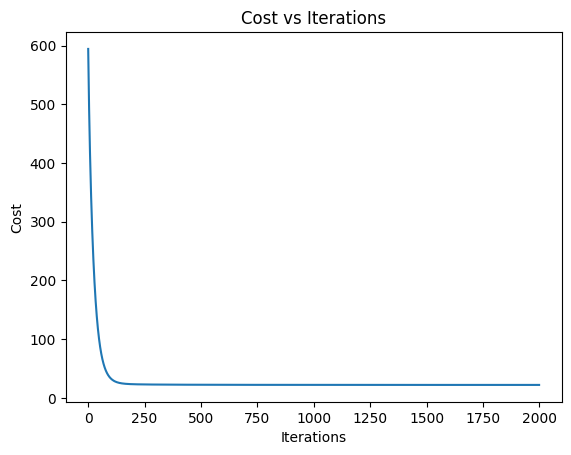

In [166]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()